In [53]:
import keras
keras.__version__

'2.2.4'

# About this code
<p>This notebook contains the code samples found in Chollet's Deep Learning with Python book</p>
<p>This is a simple two-layer NN learning from IMDB movie reviews Keras dataset. It is able to make predictions with 88% accuracy, where state of the art would be 95%. </p>
<p>More details can be found in Chapter 3, Section 5 of the book </p>

<p>Tested on:</p>
<blockquote>Keras 2.2.4 with Tensorflow backend, NVidia GeForce GTX 1080</blockquote>

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [26]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[5]])

In [27]:
decoded_review

"? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br"

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [32]:
x_train.shape

(25000, 10000)

In [34]:
x_test.shape

(25000, 10000)

In [36]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [39]:
# Building the network model 
# Simple stack of fully-connected
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
# Extracting 10,000 reviews for validation set  
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [44]:
# Training and validation
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 400us/step - loss: 0.5223 - acc: 0.7747 - val_loss: 0.3959 - val_acc: 0.8592
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.3142 - acc: 0.9003 - val_loss: 0.3118 - val_acc: 0.8844
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2307 - acc: 0.9255 - val_loss: 0.3005 - val_acc: 0.8809
Epoch 4/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1817 - acc: 0.9428 - val_loss: 0.2791 - val_acc: 0.8877
Epoch 5/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1481 - acc: 0.9544 - val_loss: 0.2772 - val_acc: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1212 - acc: 0.9635 - val_loss: 0.3080 - val_acc: 0.8804
Epoch 7/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0991 - acc: 0.9727 - val_loss: 0.3032 - 

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

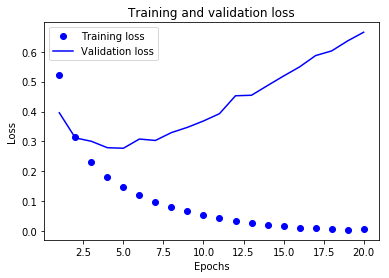

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

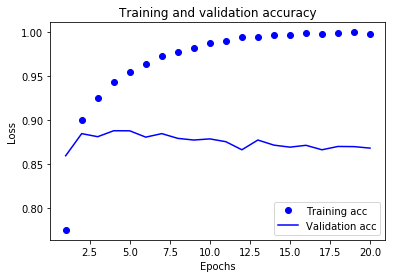

In [48]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [50]:
# generate the likelihood of reviews being positive
model.predict(x_test)

array([[0.00508968],
       [0.9999999 ],
       [0.9720711 ],
       ...,
       [0.0029109 ],
       [0.01526082],
       [0.7591252 ]], dtype=float32)

In [51]:
# Trying a second network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 133us/step


In [52]:
results

[0.3231545869159698, 0.87348]